# 第09章 绘图和可视化

信息可视化（也叫绘图）是数据分析中最重要的工作之一。它可能是探索过程的一部分，例如，帮助我们找出异常值、必要的数据转换、得出有关模型的idea等。另外，做一个可交互的数据可视化也许是工作的最终目标。Python有许多库进行静态或动态的数据可视化，但我这里重要关注于matplotlib（http://matplotlib.org/）和基于它的库。

matplotlib是一个用于创建出版质量图表的桌面绘图包（主要是2D方面）。该项目是由John Hunter于2002年启动的，其目的是为Python构建一个MATLAB式的绘图接口。matplotlib和IPython社区进行合作，简化了从IPython shell（包括现在的Jupyter notebook）进行交互式绘图。matplotlib支持各种操作系统上许多不同的GUI后端，而且还能将图片导出为各种常见的矢量（vector）和光栅（raster）图：PDF、SVG、JPG、PNG、BMP、GIF等。除了几张，本书中的大部分图都是用它生成的。

随着时间的发展，matplotlib衍生出了多个数据可视化的工具集，它们使用matplotlib作为底层。其中之一是seaborn（http://seaborn.pydata.org/），本章后面会学习它。

学习本章代码案例的最简单方法是在Jupyter notebook进行交互式绘图。在Jupyter notebook中执行下面的语句：

In [1]:
# %matplotlib notebook

%matplotlib widget

# 9.1 matplotlib API入门

 matplotlib的通常引入约定是：

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

在Jupyter中运行%matplotlib notebook（或在IPython中运行%matplotlib），就可以创建一个简单的图形。如果一切设置正确，会看到图9-1：

In [3]:
data = np.arange(10)

data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

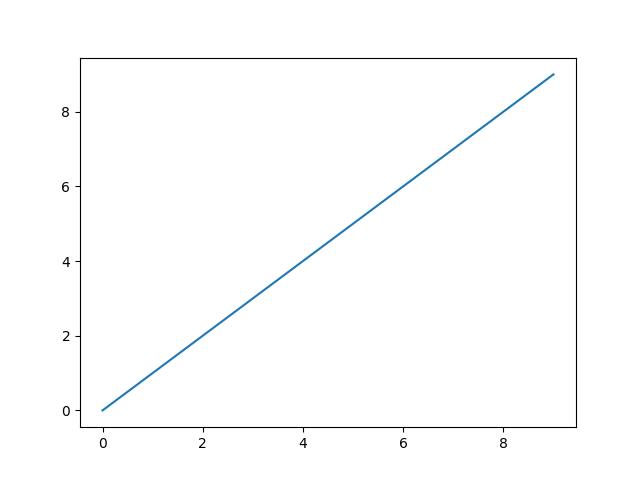

In [4]:
# %matplotlib widget

# %matplotlib inline

plt.plot(data)

虽然seaborn这样的库和pandas的内置绘图函数能够处理许多普通的绘图任务，但如果需要自定义一些高级功能的话就必须学习matplotlib API。

>笔记：虽然本书没有详细地讨论matplotlib的各种功能，但足以将你引入门。matplotlib的示例库和文档是学习高级特性的最好资源。

## Figure和Subplot

matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：

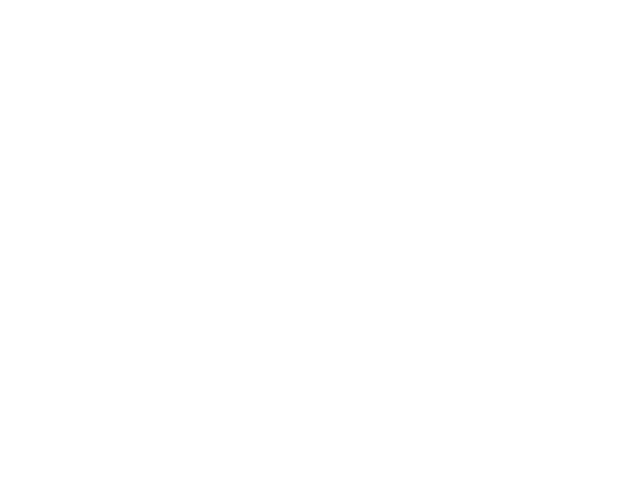

In [5]:
fig = plt.figure()

如果用的是IPython，这时会弹出一个空窗口，但在Jupyter中，必须再输入更多命令才能看到。plt.figure有一些选项，特别是figsize，它用于确保当图片保存到磁盘时具有一定的大小和纵横比。

不能通过空Figure绘图。必须用add_subplot创建一个或多个subplot才行：

In [6]:
ax1 = fig.add_subplot(2, 2, 1)

这条代码的意思是：图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）。如果再把后面两个subplot也创建出来，最终得到的图像如图9-2所示：

In [7]:
ax2 = fig.add_subplot(2, 2, 2)

In [8]:
ax3 = fig.add_subplot(2, 2, 3)

>提示：使用Jupyter notebook有一点不同，即每个小窗重新执行后，图形会被重置。因此，对于复杂的图形，，你必须将所有的绘图命令存在一个小窗里。

这里，我们运行同一个小窗里的所有命令：

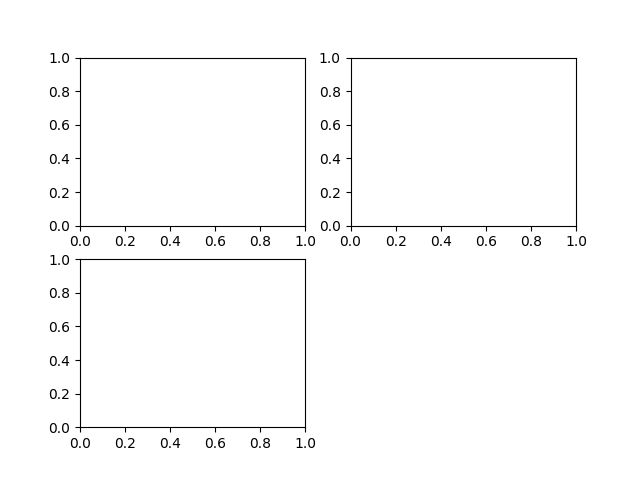

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

如果这时执行一条绘图命令（如plt.plot([1.5, 3.5, -2, 1.6])），matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制，隐藏创建figure和subplot的过程。因此，如果我们执行下列命令，你就会得到如图9-3所示的结果：

In [10]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。上面那些由fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其它空着的格子里面画图了，如图9-4所示：

In [11]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 1.,  0.,  0.,  1.,  2.,  0.,  9.,  8.,  7., 13., 11.,  7.,  8.,
        11.,  8.,  5.,  0.,  4.,  3.,  2.]),
 array([-2.72908092, -2.47353548, -2.21799004, -1.96244459, -1.70689915,
        -1.4513537 , -1.19580826, -0.94026282, -0.68471737, -0.42917193,
        -0.17362649,  0.08191896,  0.3374644 ,  0.59300984,  0.84855529,
         1.10410073,  1.35964617,  1.61519162,  1.87073706,  2.12628251,
         2.38182795]),
 <BarContainer object of 20 artists>)

In [12]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

你可以在matplotlib的文档中找到各种图表类型。

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

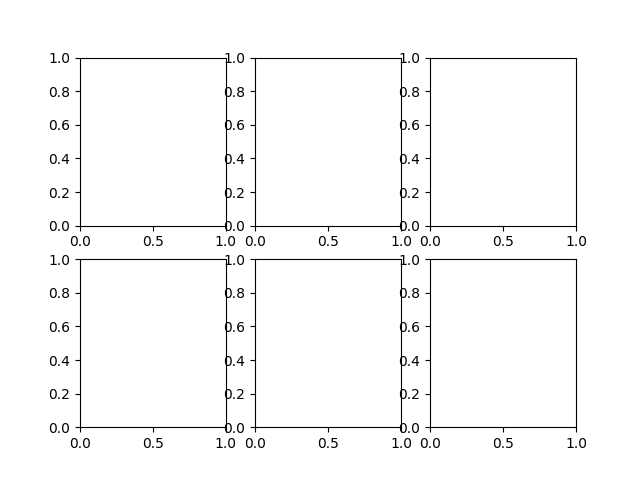

In [13]:
fig, axes = plt.subplots(2, 3)

axes

这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。有关该方法的更多信息，请参见表9-1。

## 调整subplot周围的间距

默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数：

In [ ]:
subplots_adjust(left=None, 
                bottom=None, 
                right=None, 
                top=None,
                wspace=None, hspace=None)

wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。下面是一个简单的例子，其中我将间距收缩到了0（如图9-5所示）：

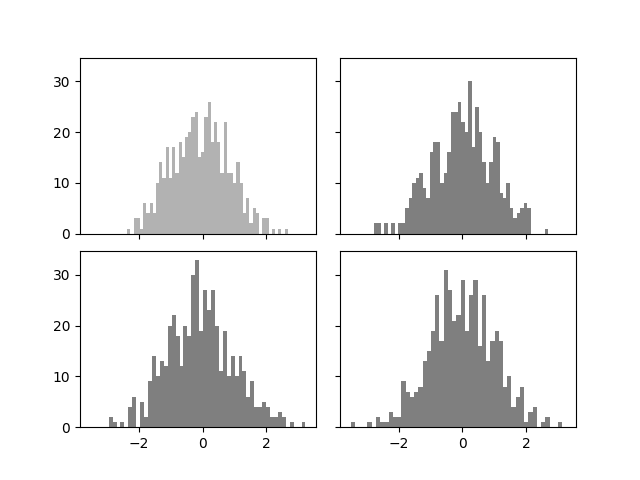

In [39]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)


axes[0, 0].hist(np.random.randn(500), bins=50, color='k', alpha=0.3)
axes[0, 1].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
axes[1, 0].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
axes[1, 1].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
 

plt.subplots_adjust(wspace=0.1, hspace=0.1)

不难看出，其中的轴标签重叠了。matplotlib不会检查标签是否重叠，所以对于这种情况，你只能自己设定刻度位置和刻度标签。后面几节将会详细介绍该内容。

## 颜色、标记和线型

matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线，你可以执行如下代码：

In [23]:
ax.plot(x, y, 'g--')

NameError: name 'ax' is not defined

这种在一个字符串中指定颜色和线型的方式非常方便。在实际中，如果你是用代码绘图，你可能不想通过处理字符串来获得想要的格式。通过下面这种更为明确的方式也能得到同样的效果：

In [24]:
ax.plot(x, y, linestyle='--', color='g')

NameError: name 'ax' is not defined

常用的颜色可以使用颜色缩写，你也可以指定颜色码（例如，'#CECECE'）。你可以通过查看plot的文档字符串查看所有线型的合集（在IPython和Jupyter中使用plot?）。

线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面（见图9-6）：

In [26]:
from numpy.random import randn

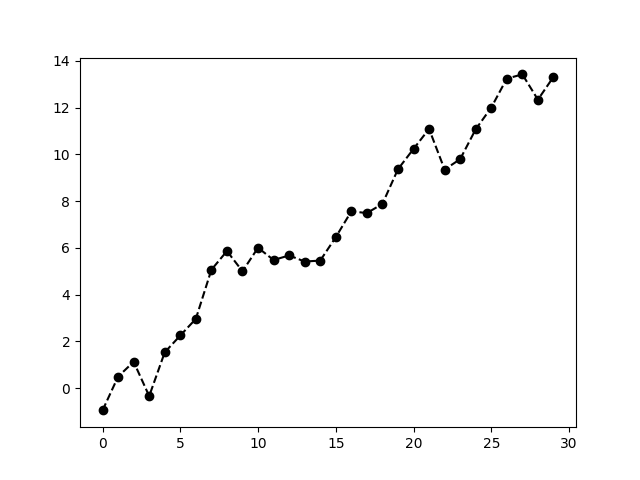

In [29]:
fig = plt.figure()

plt.plot(randn(30).cumsum(), 'ko--')